# Normal 01b - THM concentration in tap water - Stan version

# _Josep Fortiana_   &emsp;&emsp;&emsp;&emsp;&emsp;      2023-03-21

****
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cdf{\operatorname{cdf}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\diag{\operatorname{diag}}$
$\def\dprod{\displaystyle\prod}$
$\def\dsum{\displaystyle\sum}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\cZ{\cal Z}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\invgammadist{\operatorname{InvGamma}}$
$\def\invwishartdist{\operatorname{InvWishart}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\newcommand{\KL}[2]{\operatorname{KL}(\mkern2mu#1\mkern2mu\mathrel\mid\mathrel{\mkern-8mu}\mid\mkern2mu#2\mkern2mu)}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\def\median{\operatorname{median}}$
$\DeclareMathOperator{\thetaltinomialdist}{Multinomial}$
$\DeclareMathOperator{\thetaltinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\Normaldist{\operatorname{MNormal}}$
$\def\pdf{\operatorname{pdf}}$
$\def\pmf{\operatorname{pmf}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{\operatorname{P}}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\u{\mathbb{1}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

# Case study: THM concentrations ($\sigma$ known)

This problem appears in the [Web course _Bayesian Statistics for Epidemiologists_](http://www.columbia.edu/~cjd11/charles_dimaggio/DIRE/styled-4/styled-11/code-4/), also in Lunn _et al._ (2012) _The BUGS book,_ pp. 43-45.

# Problem description and data

Regional water companies in the UK are required to take routine measurements of trihalomethane (THM) concentrations in tap water samples for regulatory purposes.

Samples are tested throughout the year in each water supply zone and analysed using an assay with known measurement error having standard deviation
$\sigma = 5\theta g/L$. 

We want to learn about the average concentration in a particular zone based on $n=2$  independent measurements, $x_{1}=128 \mu g/L$ and $x_{2}=132\mu g/L$; hence their 
mean, is $\overline{x}=130\mu g/L$.

What is the best estimate of the mean concentration $\mu$?

Suppose the water company will be fined if observed THM levels in the water supply exceed $145\mu g/L$. What is the probability of this event?

In [1]:
n<-2
xbar<-130
sigma<-5

## Specify model

$$
     \begin{array}{lcll}
     x_{i}  &\sim &\normaldist(\mu,\sigma^{2}),\mskip30mu 1\leq i\leq n,&\mskip60mu\text{Observed data,}\\[0.3cm]
     \mu &\sim &\normaldist(\theta,\gamma^{2}),                              &\mskip60mu\text{Prior.}
          \end{array}
$$

# Treatment with Stan

In [2]:
#install.packages("rstan", dependencies=TRUE,repos= "https://cloud.r-project.org")
require(rstan,quietly=TRUE)
# Following directions:
# For execution on a local, multicore CPU with excess RAM we recommend calling
# options(mc.cores = parallel::detectCores()).
# To avoid recompilation of unchanged Stan programs, we recommend calling
# rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file



## 1. To obtain the prior predictive pdf, before observing  $\,\overline{x}$

In [3]:
modelString.0 <- "data {
    real theta;                 // Normal prior mean
    real<lower=0> gamma;     // Normal prior sd
    real<lower=0> sigma;    //  sd of observed INDIVIDUAL observation
    }
parameters {
    real mu;          // parameter is an unbounded real (mean of observed xbar)
    }
transformed parameters {
    }
model {
    // prior
    mu ~ normal(theta,gamma); 

    // no likelihood here
   
    }
generated quantities {
    real x0;
    
// prior prediction
    x0 = normal_rng(mu,sigma);
    }
"

In [4]:
# Translate model to C++ and compile to DSO:
stanDso.0 <- stan_model(model_code=modelString.0) 

In [5]:
# Data:
theta<-120
gamma<-10
sigma<-5
dataList.0<-list(theta=theta,gamma=gamma,sigma=sigma)

In [6]:
# Generate sample of the prior predictive pdf:
stanFit.0<-sampling(object=stanDso.0,data = dataList.0, 
                     chains = 3,
                     iter = 5000, 
                     warmup = 600, 
                     thin = 1)

In [7]:
S<-summary(stanFit.0)
round(S$summary,4)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mu,120.1691,0.1434,9.8931,100.9122,113.4366,120.1936,126.8256,139.7070,4762.181,1.0000
x0,120.2164,0.1500,11.0804,98.4054,112.7434,120.2439,127.6754,142.1133,5458.290,1.0001
lp__,-0.4895,0.0087,0.6817,-2.4481,-0.6529,-0.2244,-0.0506,-0.0006,6093.101,1.0001


### Compare with theoretical results

The prior predictive distribution should be:

$$
   x\sim\operatorname{N}\big(\theta,\sigma^{2}+\gamma^{2}\big)
$$

In [8]:
Theor.mean.prior.pred<-theta
Theor.sd.prior.pred<-sqrt(sigma^2+gamma^2)
round(Theor.mean.prior.pred,4)
round(Theor.sd.prior.pred,4)

[1] 120

[1] 11.1803

In [9]:
# extract x0 sample, discard unnecessary attributes to keep just the numbers
x0<-extract(stanFit.0,'x0')
x0<-unlist(x0,use.names=FALSE)
str(x0)

 num [1:13200] 113 107 103 111 131 ...


In [10]:
StanSim.mean.prior.pred<-mean(x0)
StanSim.sd.prior.pred<-sd(x0)
round(StanSim.mean.prior.pred,4)
round(StanSim.sd.prior.pred,4)

[1] 120.2164

[1] 11.0804

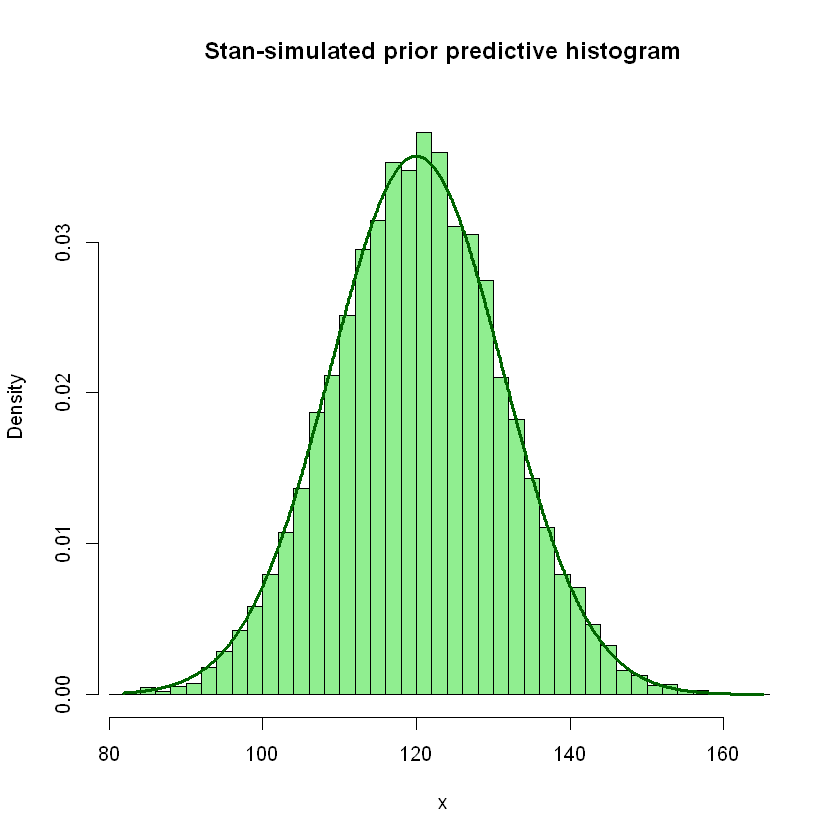

In [11]:
# plot simulated data
options(repr.plot.width=7,repr.plot.height=7)
x.min<-min(x0)
x.max<-max(x0)
hist(x0,breaks=35,freq=FALSE,col="LightGreen",xlim=c(x.min,x.max),ylim=c(0,0.038),
     xlab="x",main="Stan-simulated prior predictive histogram")
# Superimpose the theoretical density
x<-seq(x.min,x.max,length=1000)
lines(x,dnorm(x,mean=Theor.mean.prior.pred,sd=Theor.sd.prior.pred),lwd=2.5,col="DarkGreen")

## Histogram by the default Stan function

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the rstan package.
  Please report the issue at <https://github.com/stan-dev/rstan/issues/>."


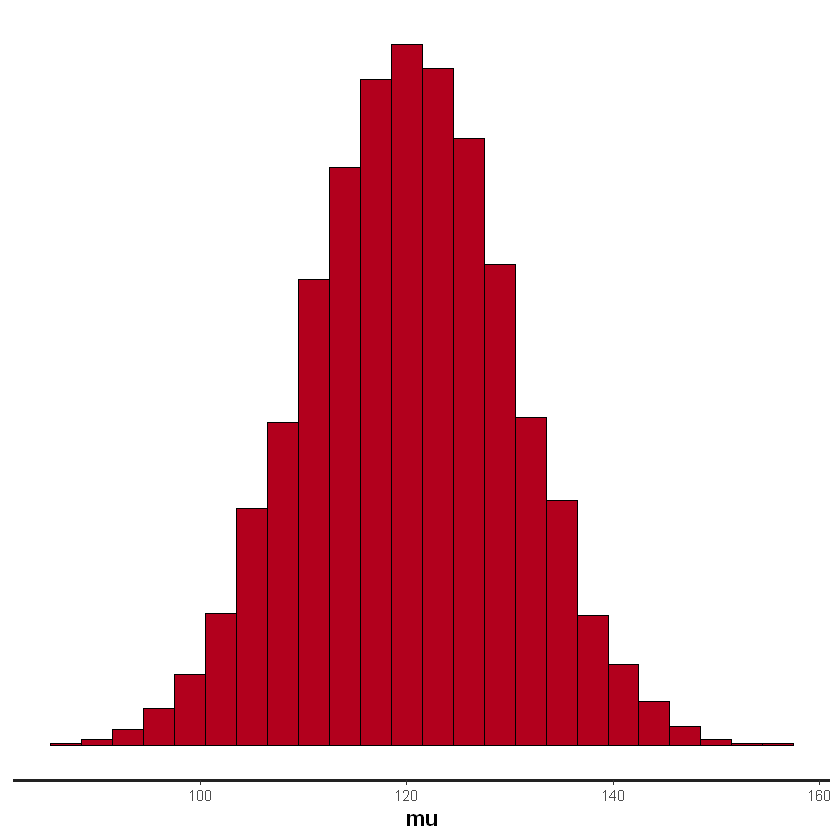

In [12]:
options(repr.plot.width=7,repr.plot.height=7)
stan_hist(stanFit.0,pars=c("mu"),binwidth=3)

## Credible interval plot

ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



'data.frame':	1 obs. of  8 variables:
 $ params: chr "mu"
 $ y     : num 1
 $ mean  : num 120
 $ ll    : num 101
 $ l     : num 107
 $ m     : num 120
 $ h     : num 133
 $ hh    : num 140


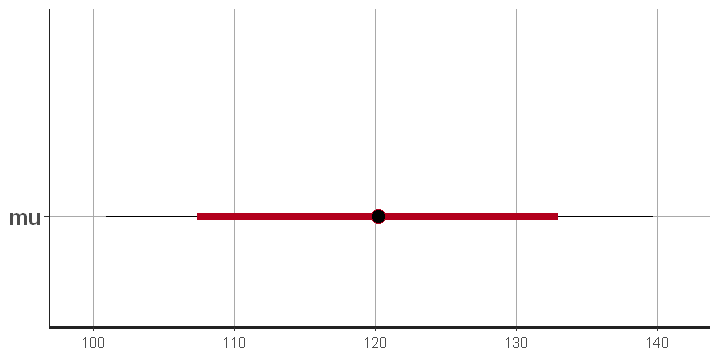

In [13]:
options(repr.plot.width=6,repr.plot.height=3)
SP<-stan_plot(stanFit.0,pars=c("mu"))
str(SP$data)  # Print bounds of 80% and 95% credible intervals
SP

## Density plot

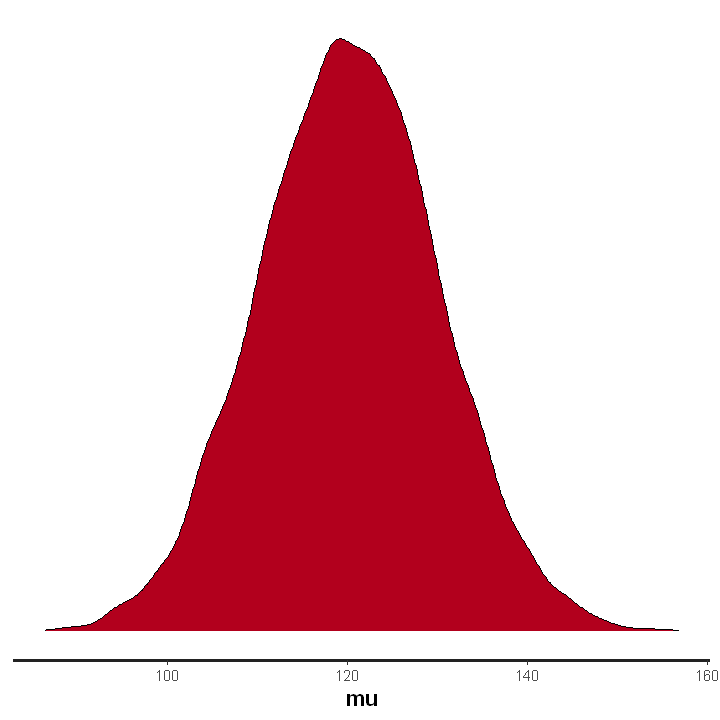

In [14]:
options(repr.plot.width=6,repr.plot.height=6)
stan_dens(stanFit.0,pars=c("mu"))

## Diagnostics: traceplot, autocorrelation plot

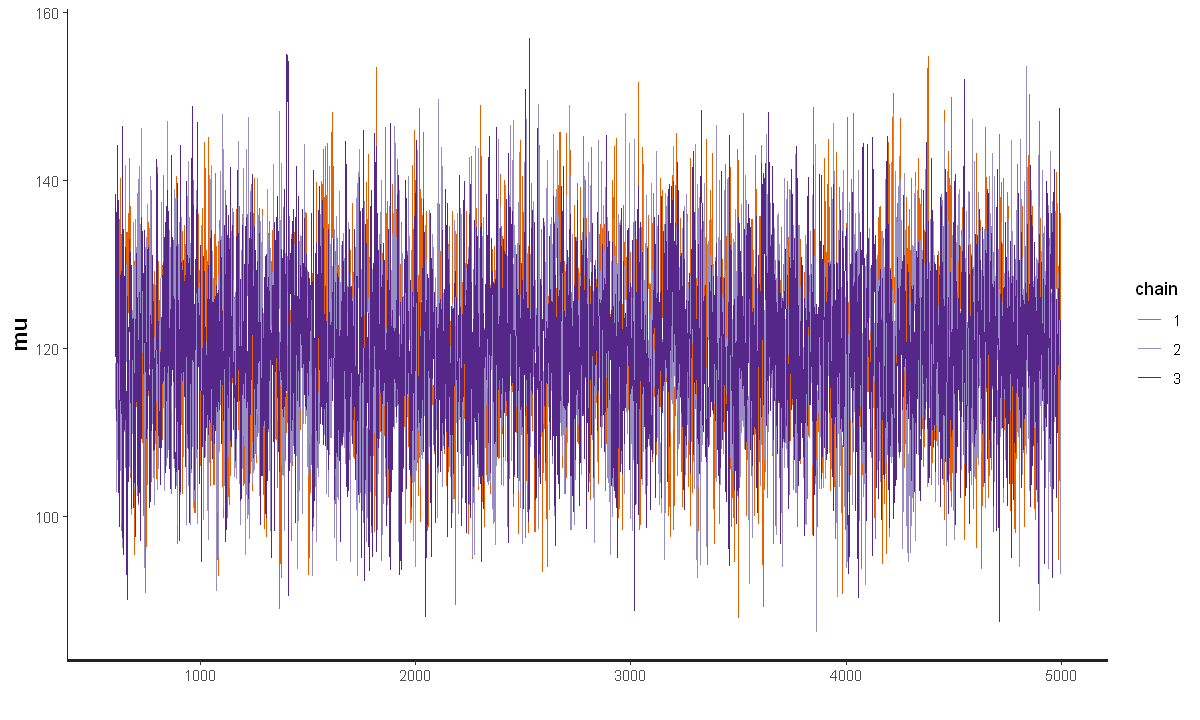

In [15]:
options(repr.plot.width=10,repr.plot.height=6)
stan_trace(stanFit.0,pars=c("mu"))

Warning message:
"Computation failed in `stat_summary()`
Caused by error in `get()`:
! object 'mean_se' of mode 'function' was not found"


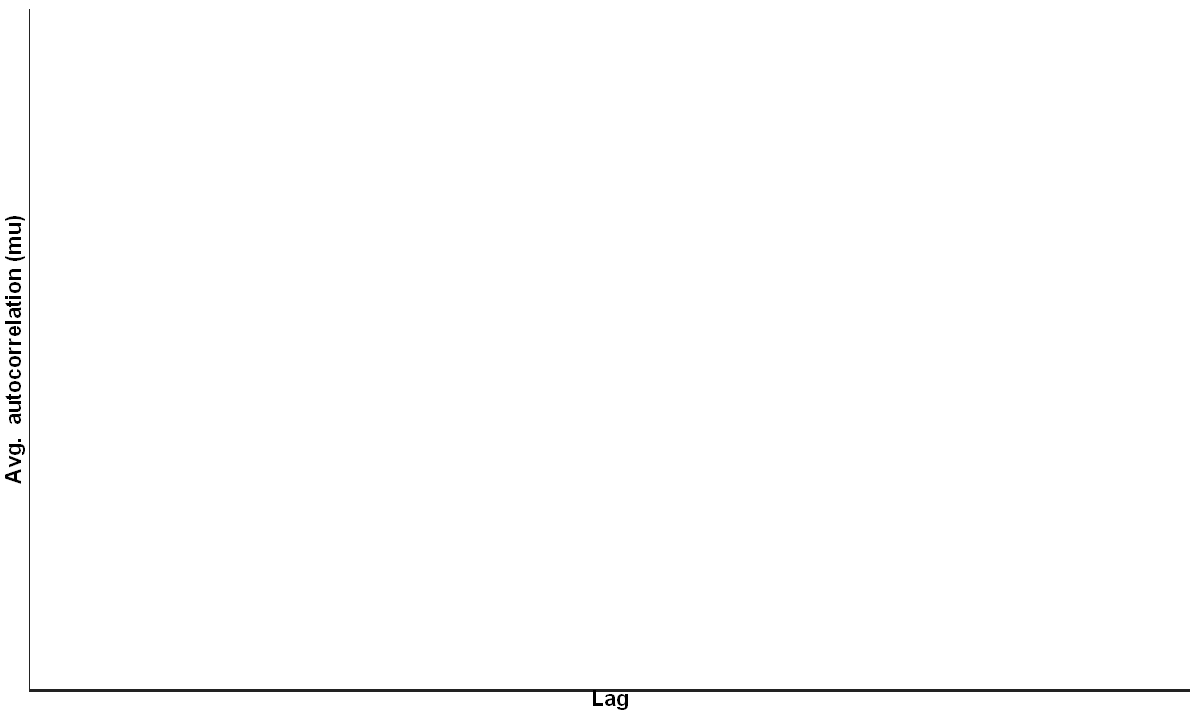

In [16]:
options(repr.plot.width=10,repr.plot.height=6)
stan_ac(stanFit.0,pars=c("mu"))

## 2. Posterior pdf and posterior predictive pdf

### Now we include likelihood and  $\,\overline{x}$

This posterior predictive distribution can be used to compute the probability that the water company will be fined next semester, which will happen if next month measurement (predicted)  $\tilde{𝑥}$  exceeds  $x_{\text{crit}}=145$.

We include an indicator `Ind_crit` in the `generated quantities` block.

In [17]:
modelString.2 <- "data {
    real theta;                 // Normal prior mean
    real<lower=0> gamma;     // Normal prior sd
    int<lower=0> n;         //  sample size
    real xbar;              //  Observed mean
    real<lower=0> sigma;    // sd(x), assumed known
    real<lower=0> sigma_n;   // This is the sd of the mean, equal to sd(x)/sqrt(n)
    real x_crit;            // Critical value, to assess the probability of a fine
    }
parameters {
    real mu;          
    }
transformed parameters {
    }
model {
    // prior
    mu ~ normal(theta,gamma); 

    //likelihood
    xbar ~ normal(mu,sigma_n);
    }
generated quantities {
    real x_pred;
    real<lower=0,upper=1> Ind_crit;     // An indicator to detect x_pred>x_crit

// posterior prediction  (here Stan will sample theta from the POSTERIOR pdf)
    x_pred = normal_rng(mu,sigma);      // Here variance must be sigma, NOT sigma_n
                                        // we are predicting a *single* new observation
                                        
    Ind_crit= int_step(x_pred-x_crit);
    }
"

In [18]:
# Translate model to C++ and compile to DSO:
stanDso.2 <- stan_model(model_code=modelString.2) 

In [19]:
# Data:
theta<-120
gamma<-10
sigma<-5
n<-2
sigma_n<-sigma/sqrt(n)
xbar<-130
x_crit<-145
dataList.2<-list(theta=theta,gamma=gamma,sigma=sigma,sigma_n=sigma_n,xbar=xbar,x_crit=x_crit)

In [20]:
# Generate sample of the prior predictive pdf:
stanFit.2<-sampling(object=stanDso.2,data = dataList.2, 
                     chains = 3,
                     iter = 15000, 
                     warmup = 3500, 
                     thin = 1)

In [21]:
S<-summary(stanFit.2)
round(S$summary,4)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mu,128.8040,0.0295,3.3414,122.2878,126.5005,128.8089,131.0711,135.3821,12840.15,1.0002
x_pred,128.7907,0.0406,6.0294,117.0321,124.7218,128.7859,132.8502,140.5148,22089.42,1.0001
Ind_crit,0.0036,0.0003,0.0598,0.0000,0.0000,0.0000,0.0000,0.0000,33658.56,1.0000
lp__,-0.9472,0.0053,0.7084,-2.9669,-1.1017,-0.6776,-0.4971,-0.4449,17608.47,1.0000


## Posterior predictive distribution

The posterior predictive distribution for a new observation $\widetilde{x}$, given the observed $\overline{x}$, is normal, with mean $\theta_{x}$ and variance the sum $\sigma^{2}+\tau^{2}$.

In [22]:
alpha<-(sigma^2/n)/((sigma^2/n)+gamma^2)
theta.x<-alpha*theta+(1-alpha)*xbar
tau2<-((sigma^2/n)*gamma^2)/((sigma^2/n)+gamma^2)
tau<-sqrt(tau2)
round(theta.x,4)
round(tau2,4)
round(tau,4)

[1] 128.8889

[1] 11.1111

[1] 3.3333

In [23]:
Theor.m.post.pred<-theta.x
Theor.var.post.pred<-sigma^2+tau^2
Theor.sd.post.pred<-sqrt(Theor.var.post.pred)
round(Theor.m.post.pred,3)
round(Theor.var.post.pred,3)
round(Theor.sd.post.pred,3)

[1] 128.889

[1] 36.111

[1] 6.009

In [24]:
round(Theor.m.post.pred,3)
round(Theor.var.post.pred,3)
round(Theor.sd.post.pred,3)

[1] 128.889

[1] 36.111

[1] 6.009

In [25]:
# extract sample from stanFit object, discarding unnecessary attributes
x_pred<-extract(stanFit.2,'x_pred')
x_pred<-unlist(x_pred,use.names=FALSE)
str(x_pred)

 num [1:34500] 122 124 126 135 130 ...


In [26]:
StanSim.mean.post.pred<-mean(x_pred)
StanSim.var.post.pred<-var(x_pred)
StanSim.sd.post.pred<-sd(x_pred)
round(StanSim.mean.post.pred,4)
round(StanSim.var.post.pred,4)
round(StanSim.sd.post.pred,4)

[1] 128.7907

[1] 36.3533

[1] 6.0294

## Predicting next semester probability of fine

In [27]:
Sim.p.fine.1<-sum(x_pred>x_crit)/length(x_pred)
round(Sim.p.fine.1,4)

[1] 0.0036

In [28]:
# With Ind_crit should be the same result, shouldn't it?
Ind_crit <- extract(stanFit.2, 'Ind_crit')
Ind_crit <- unlist(Ind_crit, use.names=FALSE)
str(Ind_crit)

 num [1:34500] 0 0 0 0 0 0 0 0 0 0 ...


In [29]:
Sim.p.fine<-sum(Ind_crit)/length(Ind_crit)
round(Sim.p.fine,4)
# Theoretical value was 0.003669567

[1] 0.0036

## Histogram by the default Stan function

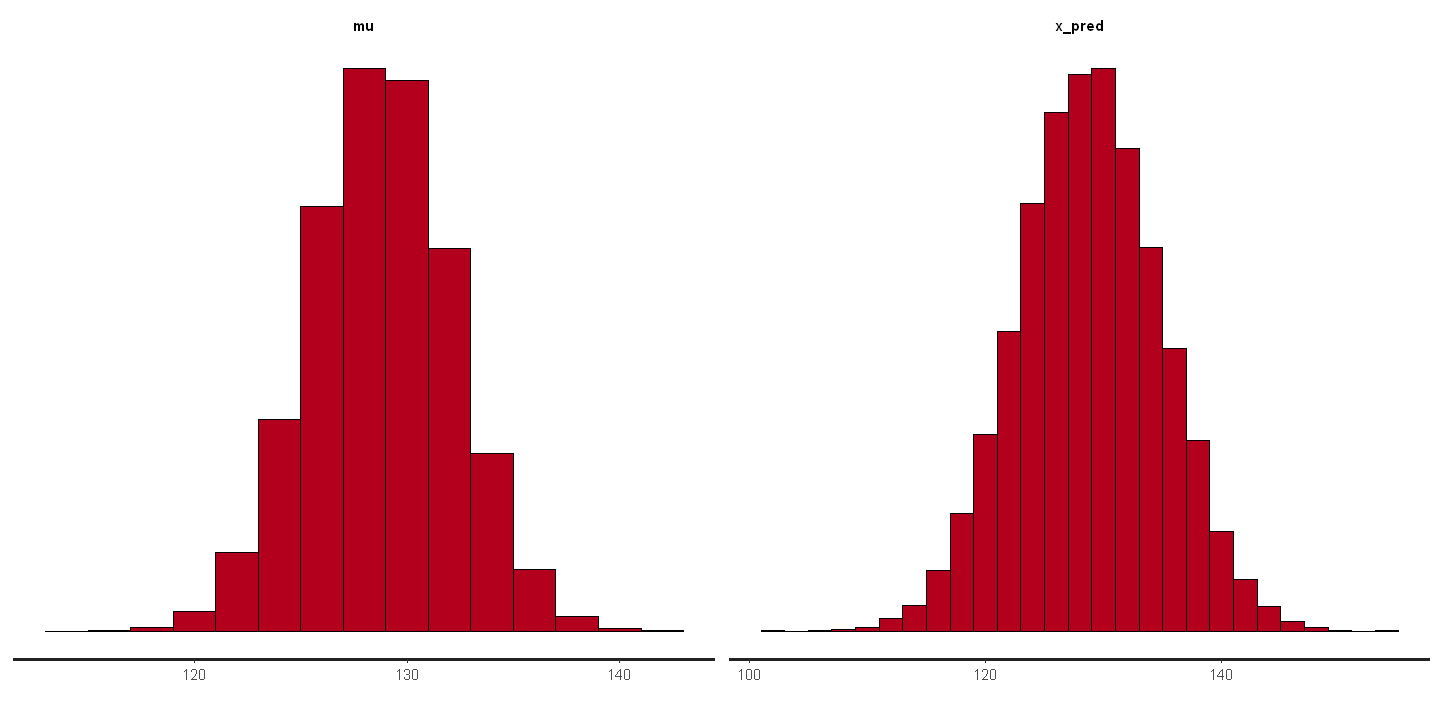

In [30]:
options(repr.plot.width=12,repr.plot.height=6)
stan_hist(stanFit.2,pars=c("mu","x_pred"),binwidth=2)

## Credible interval plot

ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



'data.frame':	2 obs. of  8 variables:
 $ params: chr  "mu" "x_pred"
 $ y     : num  2 1
 $ mean  : num  129 129
 $ ll    : num  122 117
 $ l     : num  125 121
 $ m     : num  129 129
 $ h     : num  133 137
 $ hh    : num  135 141


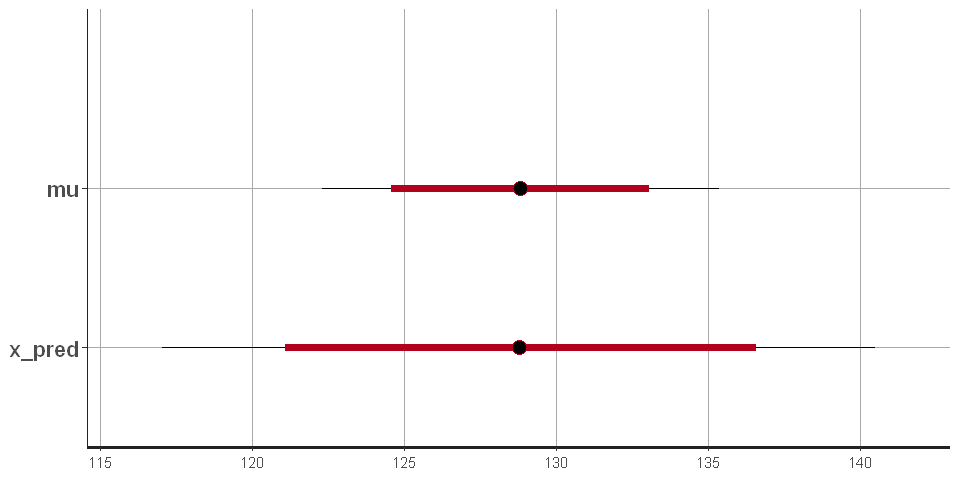

In [31]:
options(repr.plot.width=8,repr.plot.height=4)
SP<-stan_plot(stanFit.2,pars=c("mu","x_pred"))
str(SP$data)  # Print bounds of 80% and 95% credible intervals
SP

## Density plot

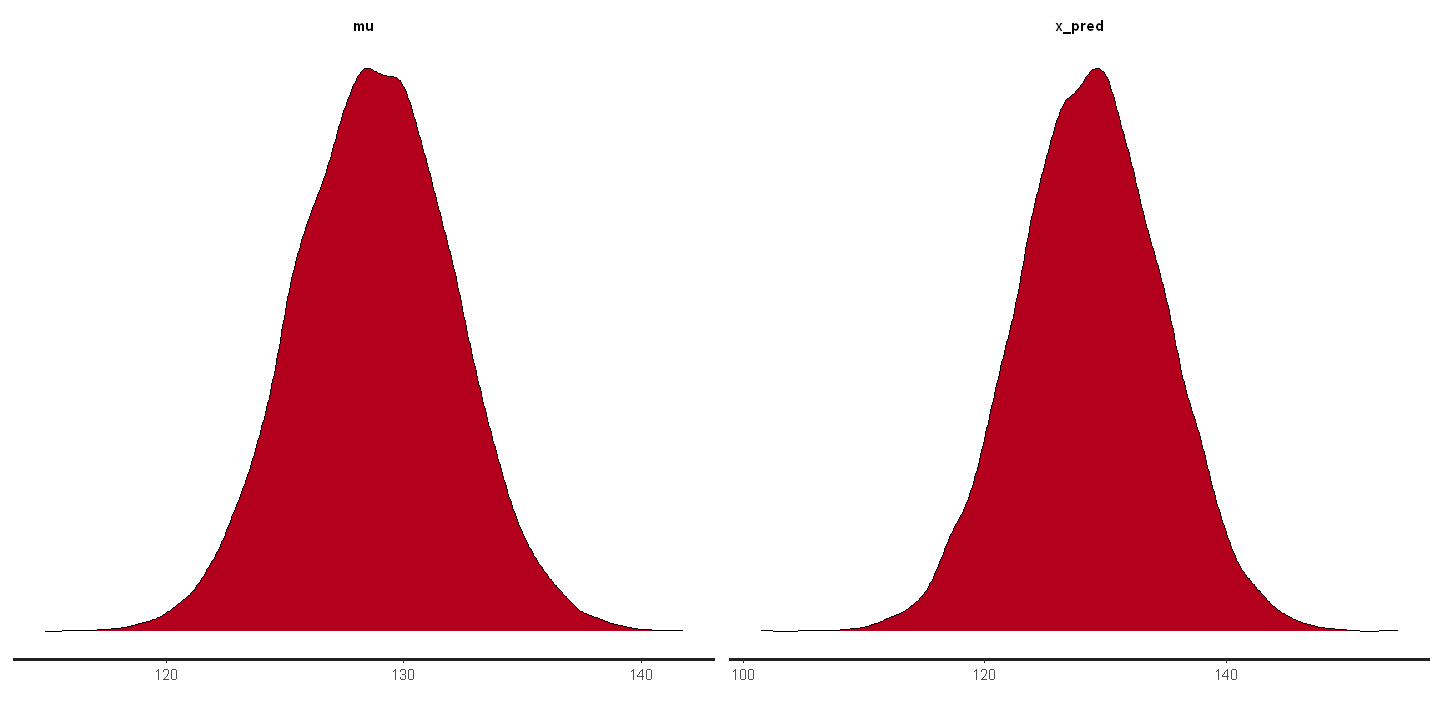

In [32]:
options(repr.plot.width=12,repr.plot.height=6)
stan_dens(stanFit.2,pars=c("mu","x_pred"))

## Diagnostics: traceplot, autocorrelation plot

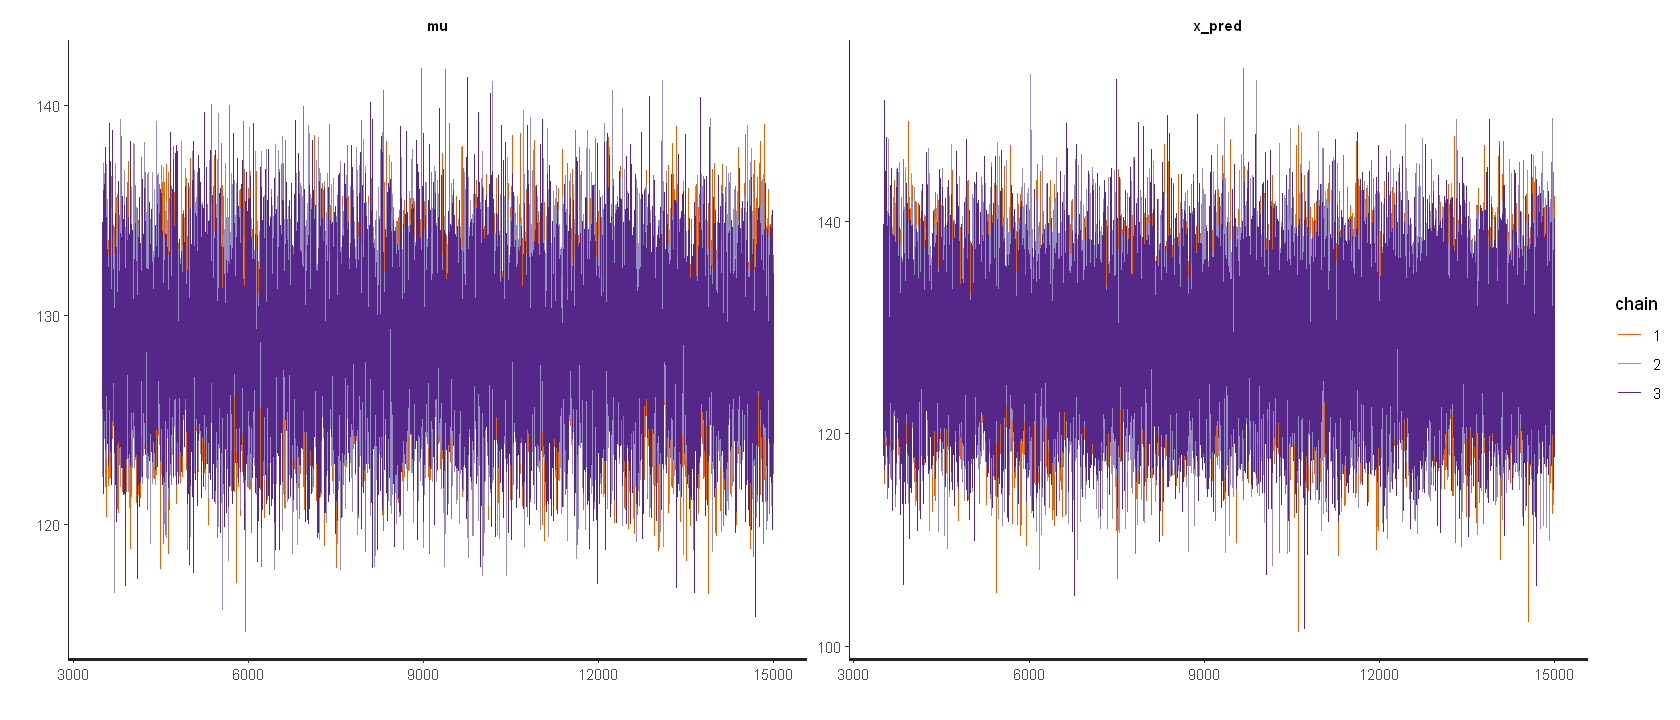

In [33]:
options(repr.plot.width=14,repr.plot.height=6)
stan_trace(stanFit.2,pars=c("mu","x_pred"))

Warning message:
"Computation failed in `stat_summary()`
Caused by error in `get()`:
! object 'mean_se' of mode 'function' was not found"
Warning message:
"Computation failed in `stat_summary()`
Caused by error in `get()`:
! object 'mean_se' of mode 'function' was not found"


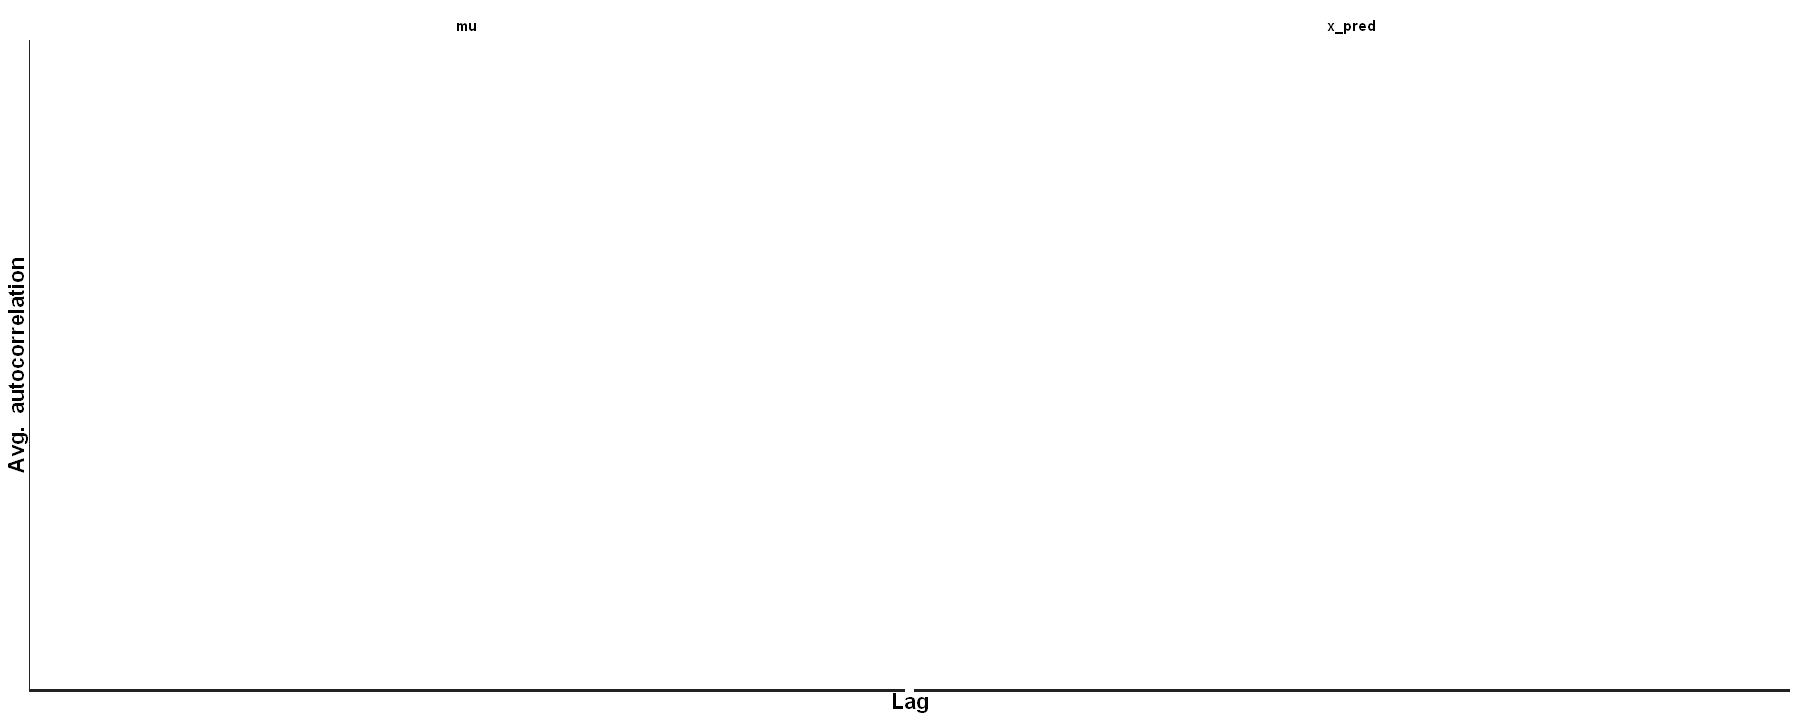

In [34]:
options(repr.plot.width=15,repr.plot.height=6)
stan_ac(stanFit.2,pars=c("mu","x_pred"))

Here we can add or replace the previous plots by. e.g. those generated with `bayesplot`

# Same diagrams with the `bayesplot` package

In [35]:
#install.packages("bayesplot", dependencies=TRUE,repos= "https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



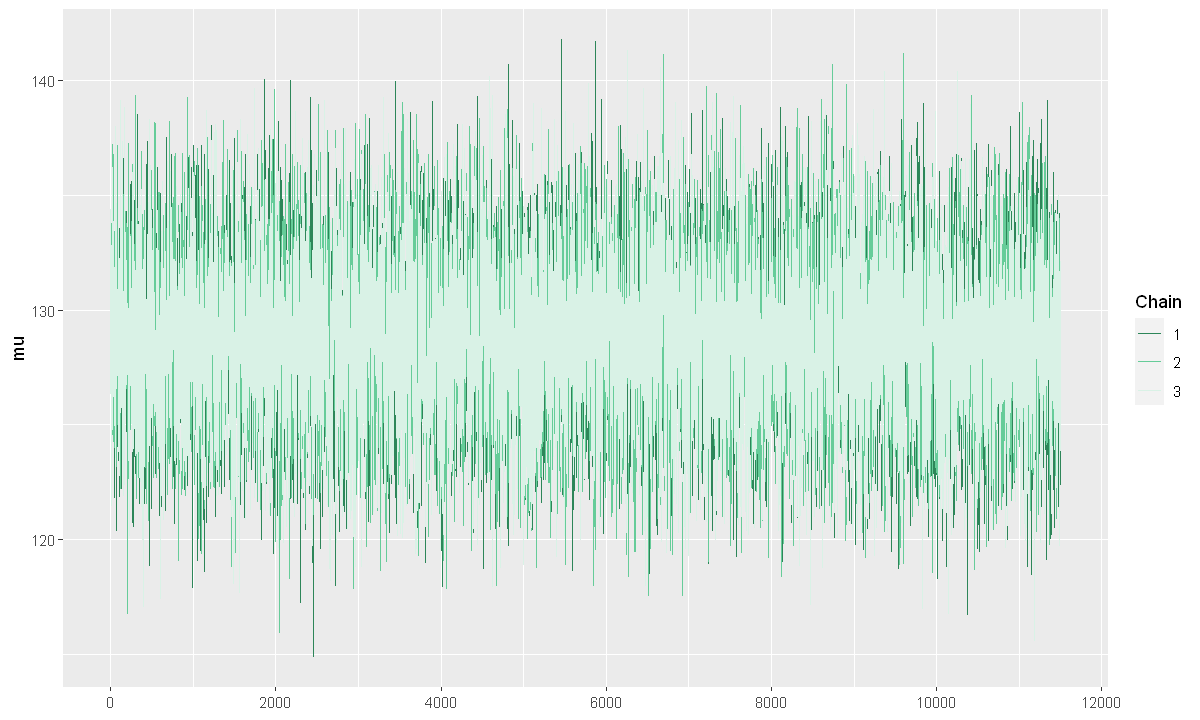

In [36]:
color_scheme_set("green")
options(repr.plot.width=10,repr.plot.height=6)
mcmc_trace(stanFit.2, pars = c("mu"))

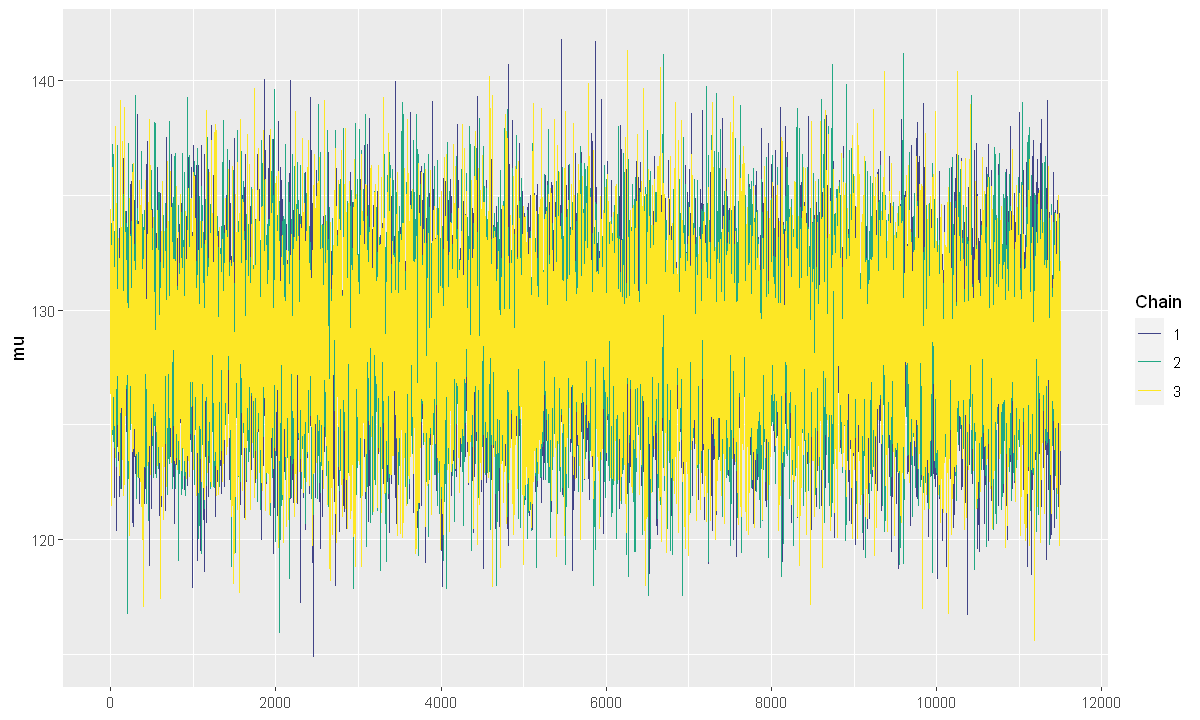

In [37]:
color_scheme_set("viridis")
options(repr.plot.width=10,repr.plot.height=6)
mcmc_trace(stanFit.2, pars = c("mu"))

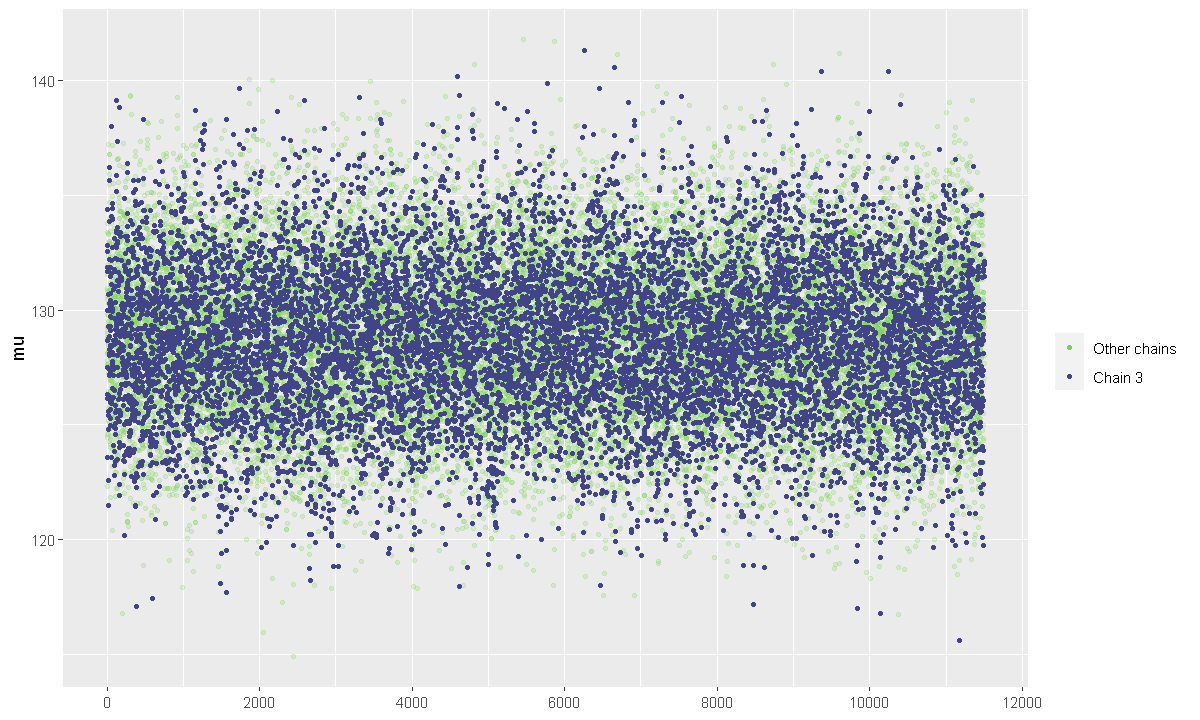

In [38]:
options(repr.plot.width=10,repr.plot.height=6)
mcmc_trace_highlight(stanFit.2, pars = c("mu"), highlight = 3)

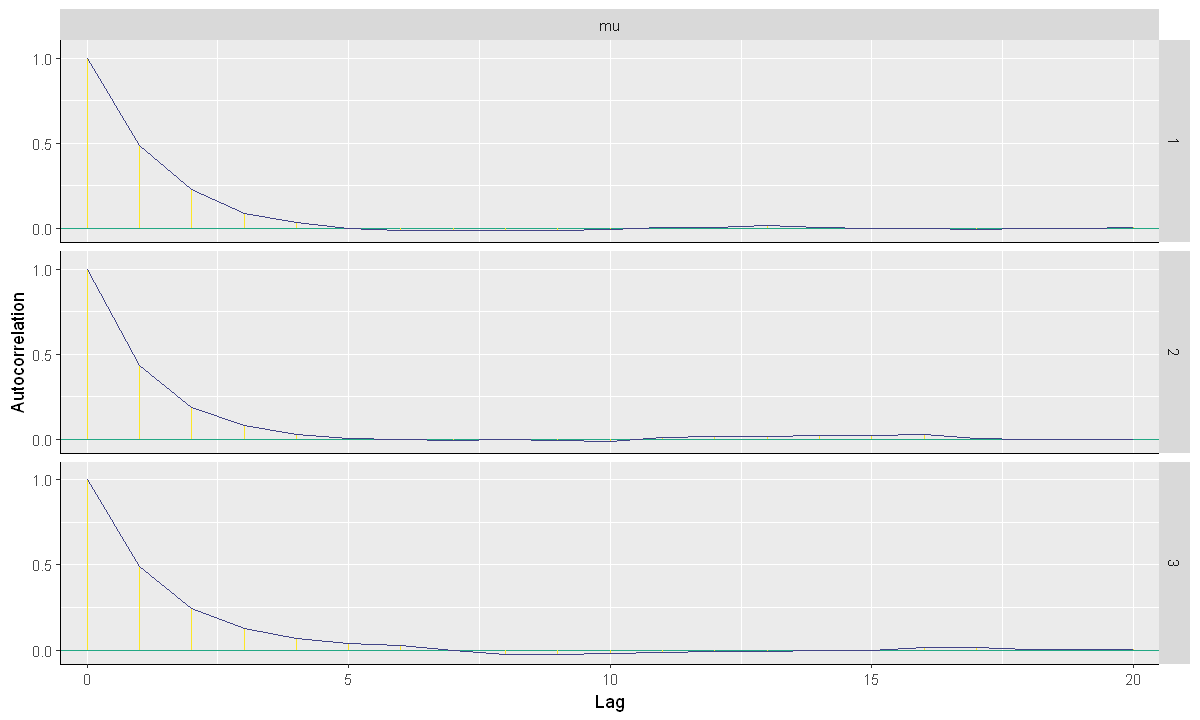

In [39]:
options(repr.plot.width=10,repr.plot.height=6)
mcmc_acf(stanFit.2,pars=c("mu"))

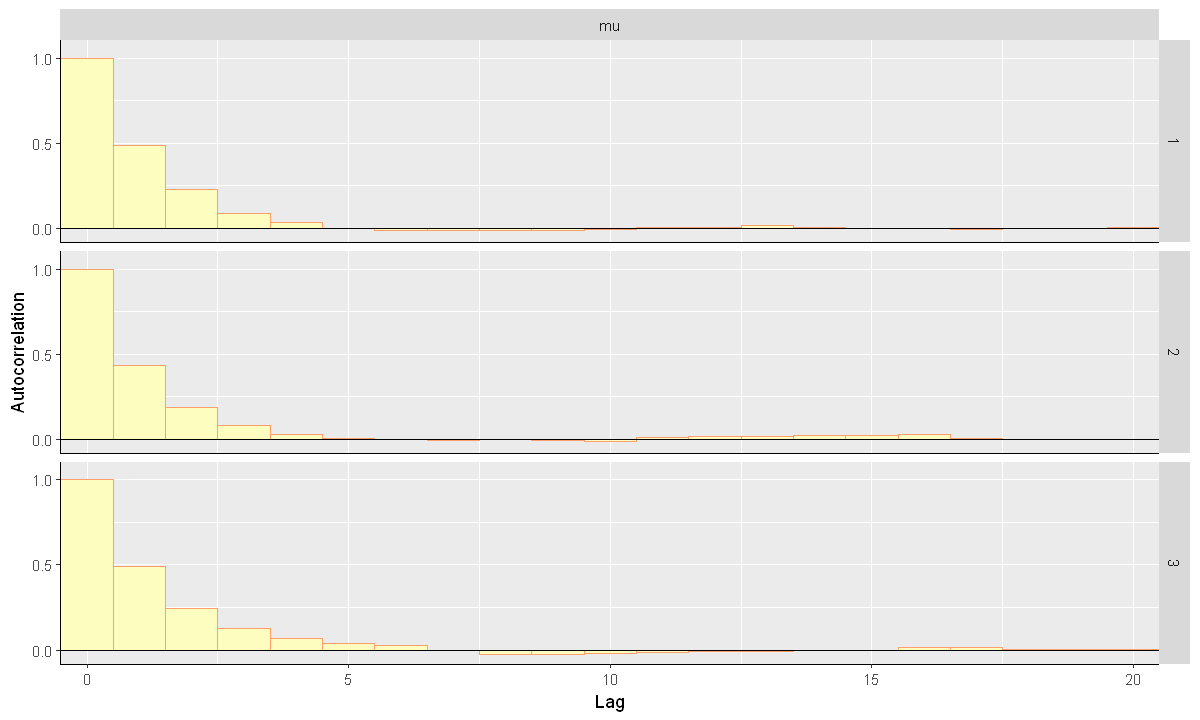

In [40]:
color_scheme_set("viridisA")
options(repr.plot.width=10,repr.plot.height=6)
mcmc_acf_bar(stanFit.2,pars=c("mu"))

## Analysis of posterior pdf properties

### Posterior credible interval 

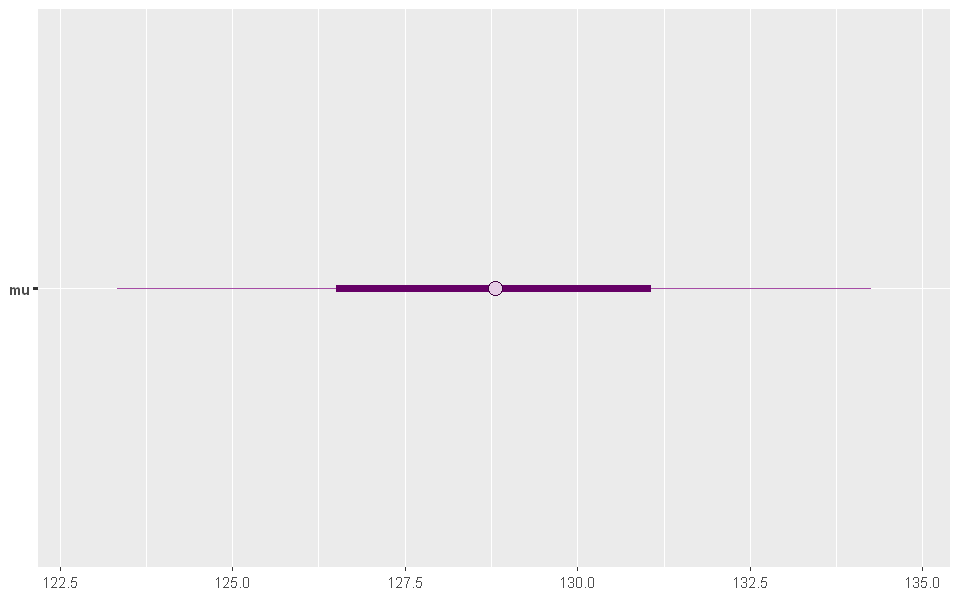

In [41]:
color_scheme_set("purple")
options(repr.plot.width=8,repr.plot.height=5)
mcmc_intervals(stanFit.2, pars = c("mu"))
# Defaults are
# prob = 0.5,
# prob_outer = 0.9,

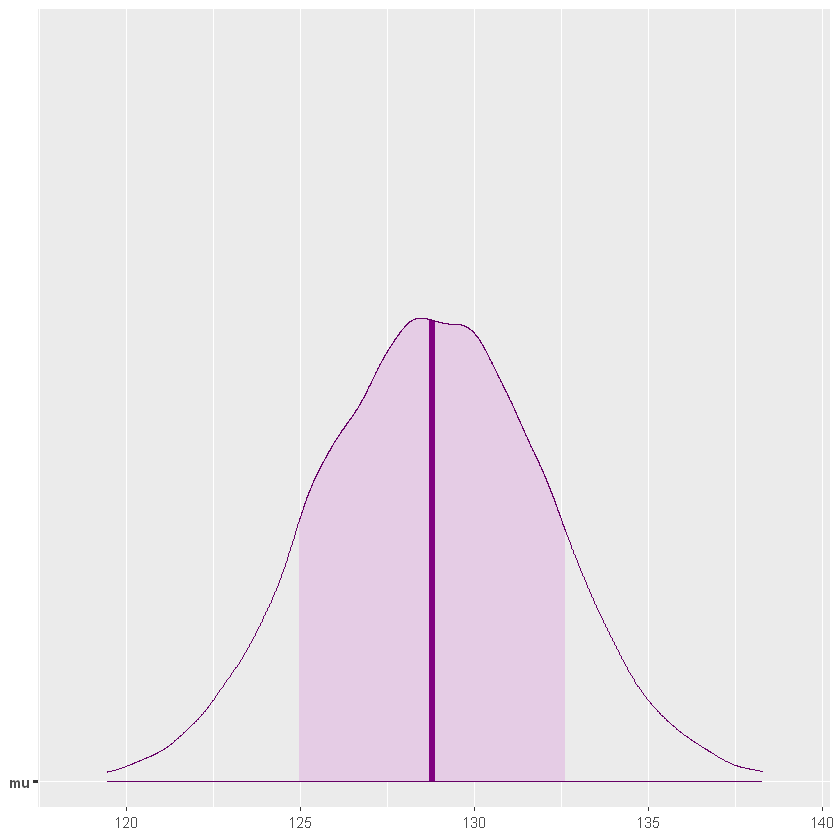

In [42]:
options(repr.plot.width=7,repr.plot.height=7)
mcmc_areas(stanFit.2, pars = c("mu"),prob=0.75,prob_outer=0.995)

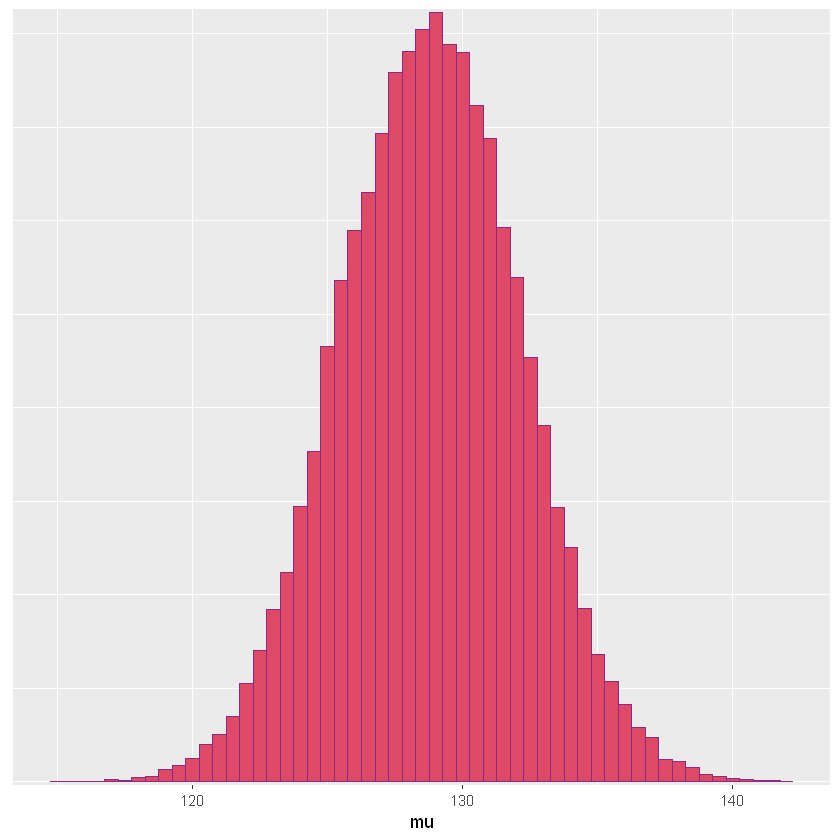

In [43]:
color_scheme_set("viridisA")
options(repr.plot.width=7,repr.plot.height=7)
mcmc_hist(stanFit.2, pars = c("mu"),binwidth=0.50)

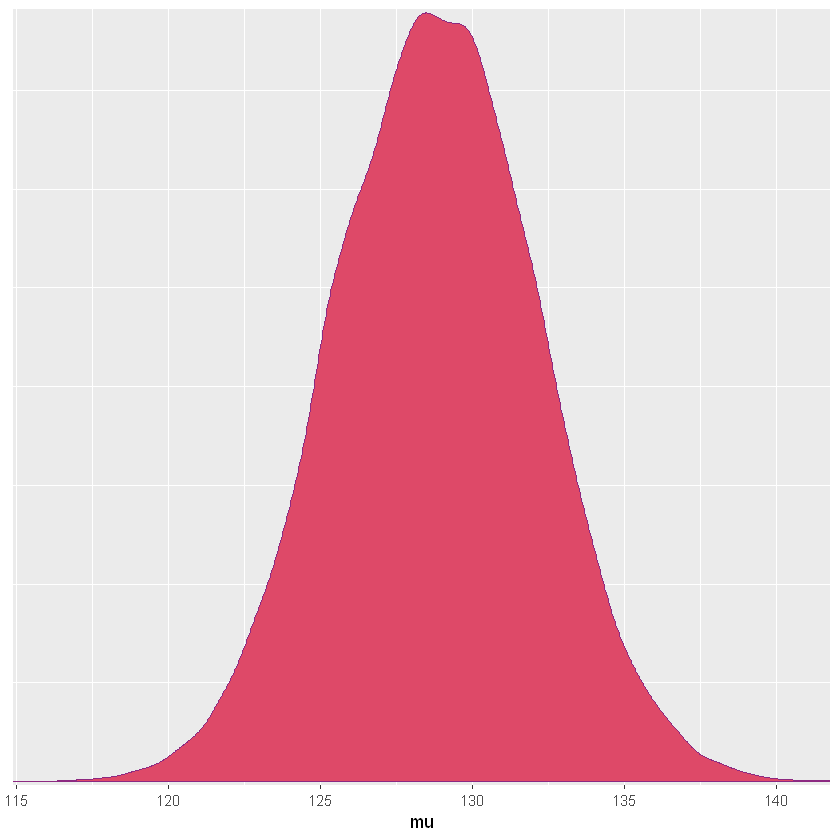

In [44]:
options(repr.plot.width=7,repr.plot.height=7)
mcmc_dens(stanFit.2, pars = c("mu"))

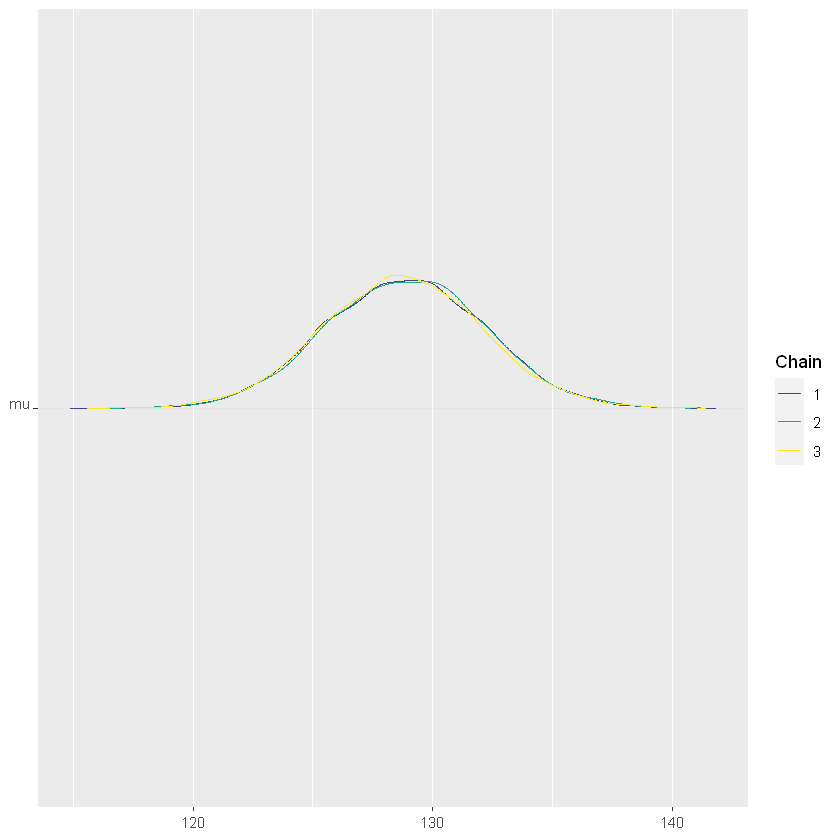

In [45]:
color_scheme_set("viridisD")
options(repr.plot.width=7,repr.plot.height=7)
mcmc_dens_chains(stanFit.2, pars = c("mu"))

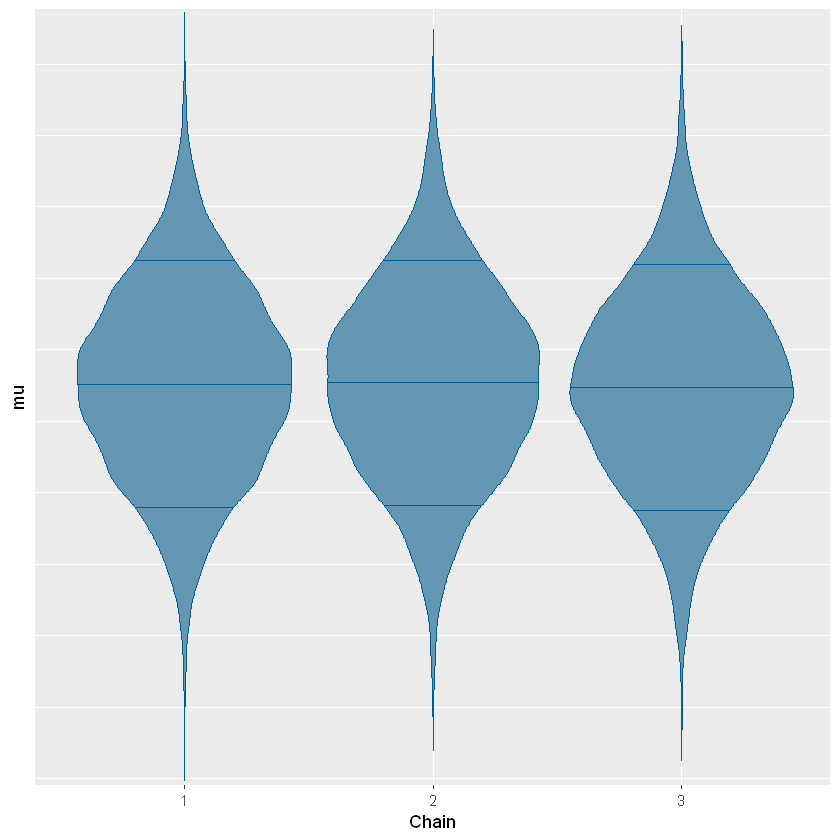

In [46]:
color_scheme_set("blue")
options(repr.plot.width=7,repr.plot.height=7)
mcmc_violin(stanFit.2, pars = c("mu"))